<center>
<img src="images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de  [Yury Kashnitsky](https://yorko.github.io). Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

##  Minería de datos- Hipótesis

In [1]:
from IPython.display import Image

### Ejercicio 1- En un consultorio oftalmológico la secretaria entrega a cada paciente la siguiente ficha, antes ser atendido, para que sea completada por el profesional:



________________________________________

    Paciente      (Nombre y Apellido)

    Edad          (años)
    
    Prescripción  (miopía-hipermetropía)
    
    Astigmatismo  (si/no)
    
    Lagrimeo      (normal/reducido)
    
________________________________________


En cada turno de trabajo se atienden seis pacientes y a continuacion se presentan las fichas completadas por el oculista adecuadamente anonimizadas 


Una vez completada la ficha, los pacientes se dirigen luego al consultorio del oftalmólogo para que
les recomienden o no el uso de lentes de contacto. Al final del dia el resumen de recomendaciones
se recopila en la siguiente tabla:

### A): Elaborar una pregunta adecuada sobre los datos para formular un problema de aprendizaje automatico basado en la recomendacion del contactologo.


Podemos predecir si el contactologo recomienda lentes duras, blandas o nada basandonos en las caracteristicas Edad, Prescripción, Atigmatismo y Lagrimeo?

### B): Señalar los problemas que tienen las tablas recolectadas en el consultorio para abordar el problema de aprendizaje supervisado.


El formato de las tablas no es adecuado. Deberiamos tenerlos en algun formato que sea legible para una computadora, ya sea csv, json, etc.
Además, es conveniente tener los datos en forma de tablas donde cada fila sea un paciente y cada columna un atributo/variable, en este caso está al revés de lo que nos gustaría.

### C): A partir de la informacion disponible, elaborar un esquema apropiado para disponer los datos en una tabla util para mineria. Identificar las caracteristicas (variables) y su tipo de datos y declarar cual es la clase y sus valores para el problema de clasificacion.


Un esquema util seria ubicar cada paciente en la fila de una tabla con las columnas

| paciente | edad | prescripcion | atigmatismo | lagrimeo | recomendacion |
| -------- | ---- | ------------ | ----------- | -------- | ------------- |
|1 |	22| 	miopia |	False |	reducido |	nada |


Las variables/caracteristicas son:
- Edad: variable continua, tipo de dato numero
- Prescripción: variable categorica, tipo de dato objeto/string
- Atigmatismo: variable categorica, tipo de dato bool
- Lagrimeo: variable categoria, tipo de dato objeto/string


La clase es la recomendación del contactologo. Los valores posibles de la clase son: duras, blandas o nada

### D): Calcular el numero total de instancias posibles, suponiendo que la posible edad de un paciente esta en el intervalo que incluye los valores 10 y 100.


Edad : 100 - 10 = 90 valores posibles  
Prescripción: Miopía, Hipermetropía: 2 valores posibles  
Atigmatismo: Sí, No: 2 valores posibles  
Lagrimeo: Normal, Reducido: 2 valores posibles  
Cantidad de instancias posibles: 90 * 2^3 = 720  
Cantidad de instancias en el espacio de hipotesis: 1 + (91 * 3^3) = 2458  

### E): Construir la tabla de mineria con los ejemplos dados a partir del esquema formulado, dejando la clase en la ultima columna.


In [2]:
import pandas as pd
data = {
    'paciente':[i for i in range(1,25)],
    'edad':[22,71,41,32,68,72,
            62,42,38,43,28,37,
            45,37,68,18,51,15,
            63,30,74,44,15,17
           ],
    'prescripcion':['miopia','miopia','hipermetropia','miopia','hipermetropia','miopia',
                    'hipermetromia','miopia','miopia','miopia','hipermetropia','miopia',
                    'hipermetromia','hipermetromia','hipermetromia','miopia','miopia','hipermetromia',
                    'miopia','miopia','hipermetromia','hipermetromia','hipermetromia','hipermetromia'
                   ],
    'atigmatismo':[False,True,False,True,True,False,
                   True,True,False,False,True,True,
                   True,False,False,True,False,False,
                   True,False,False,True,False,True
                  ],
    'lagrimeo':['reducido','normal','reducido','normal','reducido','normal',
                'normal','reducido','reducido','normal','normal','normal',
                'normal','normal','normal','reducido','reducido','normal',
                'reducido','normal','reducido','reducido','reducido','reducido'
               ],
    'recomendacion':['nada','duras','nada','duras','nada','blandas',
                     'nada', 'nada','nada','blandas','nada','duras',
                     'nada','blandas','blandas','nada','nada','blandas',
                     'nada','blandas','nada','nada','nada','nada'
                    ]
    
}
df = pd.DataFrame(data=data,columns=['paciente','edad','prescripcion','atigmatismo','lagrimeo','recomendacion'])

In [3]:
df

,paciente,edad,prescripcion,atigmatismo,lagrimeo,recomendacion
0,1,22,miopia,False,reducido,nada
1,2,71,miopia,True,normal,duras
2,3,41,hipermetropia,False,reducido,nada
3,4,32,miopia,True,normal,duras
4,5,68,hipermetropia,True,reducido,nada
5,6,72,miopia,False,normal,blandas
6,7,62,hipermetromia,True,normal,nada
7,8,42,miopia,True,reducido,nada
8,9,38,miopia,False,reducido,nada
9,10,43,miopia,False,normal,blandas


### F): Determinar a partir de los datos si las siguientes hipotesis son verdaderas o falsas:
    Si el lagrimeo es reducido entonces la recomendacion es nada (es decir, no usar lentes de contacto).
    Si la prescripcion es hipermetropia, no tiene astigmatismo y el lagrimeo es normal entonces la recomendacion es lentes duras.


In [4]:
lagrimeoReducido = df['lagrimeo']=='reducido'
df[lagrimeoReducido]

,paciente,edad,prescripcion,atigmatismo,lagrimeo,recomendacion
0,1,22,miopia,False,reducido,nada
2,3,41,hipermetropia,False,reducido,nada
4,5,68,hipermetropia,True,reducido,nada
7,8,42,miopia,True,reducido,nada
8,9,38,miopia,False,reducido,nada
15,16,18,miopia,True,reducido,nada
16,17,51,miopia,False,reducido,nada
18,19,63,miopia,True,reducido,nada
20,21,74,hipermetromia,False,reducido,nada
21,22,44,hipermetromia,True,reducido,nada


In [5]:
recomendacionNada = df['recomendacion'] == 'nada'
df[recomendacionNada]

,paciente,edad,prescripcion,atigmatismo,lagrimeo,recomendacion
0,1,22,miopia,False,reducido,nada
2,3,41,hipermetropia,False,reducido,nada
4,5,68,hipermetropia,True,reducido,nada
6,7,62,hipermetromia,True,normal,nada
7,8,42,miopia,True,reducido,nada
8,9,38,miopia,False,reducido,nada
10,11,28,hipermetropia,True,normal,nada
12,13,45,hipermetromia,True,normal,nada
15,16,18,miopia,True,reducido,nada
16,17,51,miopia,False,reducido,nada


#### Si el lagrimeo es reducido entonces la recomendacion es nada (es decir, no usar lentes de contacto).
Vemos que esto es verdadero ya que existe al menos un paciente con lagrimeo reducido cuya recomendación es sea nada, pero la hipotesis (?,?,?,?,reducido) no es consistente para la muestra ya que no todos los datos con clasificación "nada" tienen lagrimeo reducido

In [6]:
hipermetropia = df['prescripcion'] == 'hipermetropia'
atigmatismoNo = df['atigmatismo'] == False
lagrimeoNormal = df['lagrimeo'] == 'normal'
df[(hipermetropia) & (atigmatismoNo) & (lagrimeoNormal)]

,paciente,edad,prescripcion,atigmatismo,lagrimeo,recomendacion


Como no existe nadie con esas caracteristicas, la hipotesis es falsa   
H(?,?,hipermetropia,False,normal) clasifica todos los ejemplos como negativos. 

### G): Elaborar las hipotesis especificas maximales en el aprendizaje de los conceptos: prescripcion de lentes duras y prescripcion de lentes blandas. Ayuda: Reconocer previamente las variables irrelevantes para ambos problemas.


In [7]:
# Prescripción de lentes duras
lentesDuras = df['recomendacion'] == 'duras'
dfDuras = df[lentesDuras]
dfDuras

,paciente,edad,prescripcion,atigmatismo,lagrimeo,recomendacion
1,2,71,miopia,True,normal,duras
3,4,32,miopia,True,normal,duras
11,12,37,miopia,True,normal,duras


La hipotesis maximal para lentes duras sería: **H(?,?,miopia,True,normal)**

In [8]:
# Prescripción de lentes blandas
lentesDuras = df['recomendacion'] == 'blandas'
dfDuras = df[lentesDuras]
dfDuras

,paciente,edad,prescripcion,atigmatismo,lagrimeo,recomendacion
5,6,72,miopia,False,normal,blandas
9,10,43,miopia,False,normal,blandas
13,14,37,hipermetromia,False,normal,blandas
14,15,68,hipermetromia,False,normal,blandas
17,18,15,hipermetromia,False,normal,blandas
19,20,30,miopia,False,normal,blandas


La hipotesis maximal para lentes duras sería: **H(?,?,?,False,normal)**

### H): Utilizando las hipotesis especıficas elaboradas, construir un arbol de decision utilizando en cada nodo la sentencia if sobre los valores una caracterıstica para reproducir el criterio de clasificacion empleado en el consultorio oftalmologico. 
Ayuda: Las decisiones en cada nodo sobre los valores de las caracteristicas son todas binarias y no se repiten caracteristicas una vez usadas. La construccion de este arbol determina una jerarquia de las caracteristicas en cuanto su importancia en la determinacion de la clase.

In [9]:
from graphviz import Digraph
dot = Digraph(comment='Recomendación contactologo')

dot.node('A','prescripcion')
dot.node('B','atigmatismo')
dot.node('C','lagrimeo')
dot.node('D','lentes blandas')
dot.node('E','lentes duras')
dot.node('F','nada')

dot.edge('C','F',label='  reducido')
dot.edge('C','B',label='normal')
dot.edge('B','D',label='no')
dot.edge('B','A',label='si')
dot.edge('A','E',label='miopia')
dot.edge('A','F',label='hipermetropia')


Este seria el arbol que refleja el criterio de clasificacion del consultorio, consideramos todas las respuestas para las cuales no tenemos hipotesis como que el contactologo recomendo "nada" y vemos que esta clase queda completamente determinada por las otras dos. 
Llegamos a este arbol de desicion que clasifica muy bien los ejemplos de entrenamiento

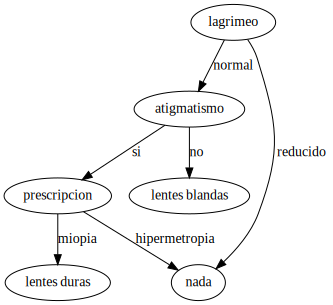

In [10]:
dot

La clase "nada" queda completamente determinada por las otras dos clases.

### Ejercicio 2: Se desea inferir el método de elección de libros de lectura. Para ello se estudian los siguientes variables

Y se recolectan los siguientes datos.

### A): A partir de la informacion disponible, elabore un dataframe adecuado para minería. Identifique las caracteristicas (variables) y su tipo de datos y declare cual es la clase y sus valores para el problema de clasificacion.

Las variables son:
- Autor: categorica discreta con 2 categorias
- Trama: categorica discreta con 2 categorias
- Longitud: categorica discreta con 2 categorias
- Sitio: categorica discreta con 2 categoricas
- Ejemplo: podria considerarse como una variable categorica o bien una numerica discreta. Igual no nos sirve para nada

La clase es "acción", y tiene dos posibles variables: saltar y leer

In [11]:
data = {
    'accion':['saltar','leer','saltar','saltar','leer','saltar',
                     'saltar','leer','saltar','saltar','saltar','saltar',
                     'leer','leer','leer','leer','leer','leer'
                    ],
    'autor':['conocido','desconocido','desconocido','conocido','conocido','conocido',
             'desconocido','desconocido','conocido','conocido','desconocido','conocido',
             'conocido','conocido','conocido','conocido','conocido','desconocido'
            ],
    'trama':['nuevo','nuevo', 'viejo', 'viejo','nuevo','viejo',
             'viejo', 'nuevo', 'viejo','nuevo', 'viejo','nuevo',
             'viejo','nuevo', 'nuevo','viejo', 'nuevo','nuevo'
            ],
    'sitio':['casa','trabajo','trabajo','casa','casa','trabajo',
             'trabajo','trabajo','casa','trabajo','casa','trabajo',
             'casa','trabajo','casa','trabajo','casa','trabajo'
            ],
    'longitud':['largo','corto','largo','largo','corto','largo',
                'corto','corto','largo','largo','corto','largo',
                'corto','corto','corto','corto','corto','corto'
               ] 
    
}

df = pd.DataFrame(data=data,columns=['autor','trama','sitio','longitud','accion'])
df

,autor,trama,sitio,longitud,accion
0,conocido,nuevo,casa,largo,saltar
1,desconocido,nuevo,trabajo,corto,leer
2,desconocido,viejo,trabajo,largo,saltar
3,conocido,viejo,casa,largo,saltar
4,conocido,nuevo,casa,corto,leer
5,conocido,viejo,trabajo,largo,saltar
6,desconocido,viejo,trabajo,corto,saltar
7,desconocido,nuevo,trabajo,corto,leer
8,conocido,viejo,casa,largo,saltar
9,conocido,nuevo,trabajo,largo,saltar


### B): Calcule el numero total de instancias posibles.

Acción (leer-no leer) => 2 opciones  
Autor:(conocido-desconocido) => 2 opciones  
Trama:(nueva-vieja) => 2 opciones  
Longitud:(largo-corto) => 2 opciones  
Sitio:(casa-trabajo) => 2 opciones  
El total de instancias posibles es 2^5 = 32
El total de hipotesis posibles es 1+3^5 = 244

### C): Determinar a partir de los datos si las siguientes hipotesis son verdaderas o falsas:


    Si el el libro es de un autor conocido con una trama vieja, es corto y se desea leer en camino al trabajo, la recomendación es no leer. 
    Falso!!!
    
    Si el el libro es de un autor desconocido con una trama nueva, es corto y se desea leer en camino al trabajo, la recomendación es leer.
    Verdadero


In [12]:
NoLeer = df['accion'] == 'saltar'
Leer = df['accion'] == 'leer'

In [13]:
autorConocido = df['autor'] == 'conocido'
tramaVieja = df['trama'] == 'viejo'
corto = df['longitud'] == 'corto'
trabajo = df['sitio'] == 'trabajo'
df[autorConocido & tramaVieja & corto & trabajo]

,autor,trama,sitio,longitud,accion
15,conocido,viejo,trabajo,corto,leer


Falsa!! 
No podemos encontrar ningun dato con esas caracteristicas cuya recomendación sea saltar/No leer

In [14]:
df[~autorConocido & corto & ~tramaVieja & trabajo]

,autor,trama,sitio,longitud,accion
1,desconocido,nuevo,trabajo,corto,leer
7,desconocido,nuevo,trabajo,corto,leer
17,desconocido,nuevo,trabajo,corto,leer


Verdadero!

De hecho, existe al menos un ejemplo que cumpla la hipotesis. Es más, podemos ver que H(autor,trama,sitio,longitud,accion) = 1 (si 1 es la recomendacion de leer)

### D): Elaborar las hipotesis especificas maximales en el aprendizaje del concepto 'recomendacion para leer'. 


In [15]:
df[Leer]

,autor,trama,sitio,longitud,accion
1,desconocido,nuevo,trabajo,corto,leer
4,conocido,nuevo,casa,corto,leer
7,desconocido,nuevo,trabajo,corto,leer
12,conocido,viejo,casa,corto,leer
13,conocido,nuevo,trabajo,corto,leer
14,conocido,nuevo,casa,corto,leer
15,conocido,viejo,trabajo,corto,leer
16,conocido,nuevo,casa,corto,leer
17,desconocido,nuevo,trabajo,corto,leer


La hipotesis maximal para la recomendación leer es:  
    H(?,?,?,corto)

In [16]:
df[NoLeer]

,autor,trama,sitio,longitud,accion
0,conocido,nuevo,casa,largo,saltar
2,desconocido,viejo,trabajo,largo,saltar
3,conocido,viejo,casa,largo,saltar
5,conocido,viejo,trabajo,largo,saltar
6,desconocido,viejo,trabajo,corto,saltar
8,conocido,viejo,casa,largo,saltar
9,conocido,nuevo,trabajo,largo,saltar
10,desconocido,viejo,casa,corto,saltar
11,conocido,nuevo,trabajo,largo,saltar


La hipotesis maximal para la caracteristica saltar es
H(?,?,?,?) que no sirve para nada

### E): Utilizando las hipotesis especıficas elaboradas, construir un arbol de decision utilizando en cada nodo la sentencia if sobre los valores una caracterıstica para reproducir el criterio de clasificacion empleado.

In [17]:
from graphviz import Digraph
dot = Digraph(comment='Recomendación lectura')

dot.node('A','longitud')
dot.node('B','leer')
dot.node('C','no leer')
dot.edge('A','B',label='  corto')
dot.edge('A','C',label='   largo')


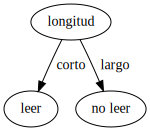

In [18]:
dot

Podemos ver que el criterio de clasificación es muy malo, ya que hay libros cortos cuya recomendación es No leer! 